Dataset saved to '/content/weather_data.csv'
Temperature    0
Humidity       0
Wind Speed     0
Pressure       0
Rain           0
dtype: int64

Training Random Forest...
Accuracy of Random Forest: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       950

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Training Support Vector Machine...
Accuracy of Support Vector Machine: 0.9810
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1050
           1       0.98      0.98      0.98       950

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Fitting 3 folds for each of 27 candidates, totalling 81 fits

B

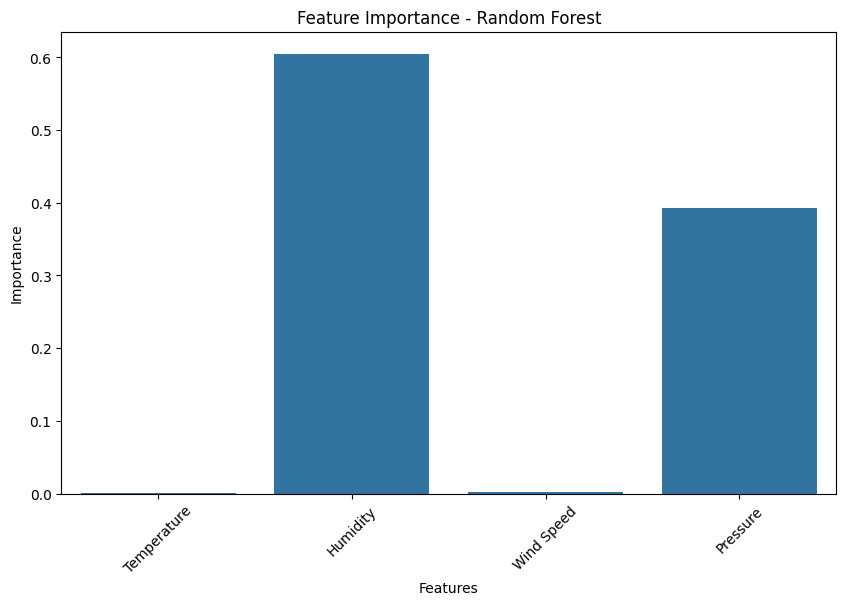

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

n_samples = 10000
temperature = np.random.uniform(15, 35, n_samples)
humidity = np.random.uniform(50, 100, n_samples)
wind_speed = np.random.uniform(0, 20, n_samples)
pressure = np.random.uniform(1000, 1020, n_samples)

rain = np.where(
    (humidity > 70) & (pressure < 1015),
    1,  # Rain
    0   # No Rain
)

df = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'Wind Speed': wind_speed,
    'Pressure': pressure,
    'Rain': rain
})

df.to_csv('/content/weather_data.csv', index=False)
print("Dataset saved to '/content/weather_data.csv'")

df = pd.read_csv('/content/weather_data.csv')

print(df.isnull().sum())

X = df.drop(columns=['Rain'])
y = df['Rain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    print(f"Accuracy of {model_name}: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=3,
                              n_jobs=-1,
                              verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_

feature_importances = best_rf_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()
